# Instituto Tecnologico de Durango

## Analitica de Datos en las Organizaciones

##  Práctica de laboratorio: Visualización de medidores de Internet 

### Brenda Raquel Sanchez Alanis 


**Objetivos**

* ** Parte 1: Limpieza y análisis de datos **
* ** Parte 2: Visualización de datos **

#### Situación/Contexto 

En esta práctica de laboratorio, aprenderá a utilizar la biblioteca de pandaspara seguir los pasos preliminares que son necesarios antes de realizar cualquier análisis de datos. Esto incluye quitar valores faltantes, cambiar el formato de los datos y realizar un análisis estadístico preliminar. Después de limpiar los datos, utilice matplotlibpara la exploración y visualización de datos.

#### Recursos 

* 1 PC con acceso a Internet
* Raspberry Pi versión 2 o superior
* Bibliotecas de Python: fecha y hora, csv, subproceso, pandas, numpy
* Archivos de datos: data_long.csv

### Parte 1: Limpieza y análisis de datos 

Se dice a veces que quienes practican el aprendizaje automático dedican el 80 % de su tiempo a la limpieza de datos. Si bien esta obtenida es probablemente una exageración, es verdad que la limpieza de datos es una tarea fundamental y necesaria para garantizar el éxito de un proyecto de aprendizaje automático. Como en otras muchas líneas de trabajo, se aplica la ley «basura que entra, basura que sale». Simplemente, no es posible realizar un análisis significativo de datos en datos sucios.

**Paso 1: Limpieza de datos**

Cargue los datos del archivo rpi_data_compact.csv. Este archivo contiene las mediciones de la velocidad de Internet adquiridas durante la práctica de laboratorio Internet_Speed_Data_Acquisition. En particular, el enfoque se encuentra en tres cantidades: tiempo de ping (ms), velocidad de descarga (Mbit/s) y velocidad de carga (Mbit/s).

**a) Lea los datos de rpi_data_compact.csv.**

Lea el archivo ./Data/rpi_data_compact.csvdentro de la estructura de datos de Pandas llamadadf_compact a través de read_csvy examine las tres primeras filas de esta estructura de datos a través de df.head.

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df_compact = pd.read_csv('./Data/rpi_data_compact.csv')
df_compact.head(3)

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime,Date,Time
0,0,26.992,91.80,14.31,2016-11-24 13:36:25,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24 13:36:55,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24 13:37:25,2016-11-24,13:37:25


**b) Elimine las columnas no deseadas.**

Como puede haber notado, la estructura de datos df_compact tiene una columna adicional. Utilice el comando df.drop para eliminar esta columna. Observe la práctica de laboratorio Internet_Speed_Data_Acquisition para obtener ayuda.

In [3]:
df_compact.drop(['Unnamed: 0'], axis =1, inplace=True)
df_compact.head(3)

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime,Date,Time
0,26.992,91.80,14.31,2016-11-24 13:36:25,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24 13:36:55,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24 13:37:25,2016-11-24,13:37:25


**c) Elimine los valores NaN.** 

Un problema típico que afecta la calidad de los datos es la presencia de valores NaN. Estos valores pueden hacer que las funciones de análisis de datos finalicen el cálculo de forma abrupta, arrojen un error o generen resultados incorrectos. Generalmente, los valores NaN representan una porción de información que el conjunto de datos debe contener pero no contiene. En este ejemplo, los valores NaN en df_compact pueden representar las mediciones donde cayó la conexión de Internet o las consultas de Raspberry Pi que el servidor Speedtest.net no pudo responder. El siguiente código revela cuántos valores NaN contiene nuestra estructura de datos.

Primero, vaya a http://pandas.pydata.org/pandas-docs/version/0.14.1/index.html y busque isnull en el cuadro de búsqueda.

La documentación de la función isnulles un poco difícil de comprender. Ventajas, la interfaz interactiva de Jupyter nos permite activar esta función y examinar rápidamente su resultado.

In [4]:
NaNs_in_df = df_compact.isnull()
print(type(NaNs_in_df))
NaNs_in_df.head()

<class 'pandas.core.frame.DataFrame'>


,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime,Date,Time
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


El resultado de la función isnull es un nuevo marco de datos que contiene un valor True o False si el elemento correspondiente de la Estructura de datos es NaN o no. Con la función sum de esta Estructura de datos convertirá automáticamente los valores True en 1 y False en 0.

In [5]:
NaNs_per_column = NaNs_in_df.sum()
print(type(NaNs_per_column))
NaNs_per_column.head()

<class 'pandas.core.series.Series'>


Ping (ms)            1
Download (Mbit/s)    1
Upload (Mbit/s)      7
Datetime             7
Date                 7
dtype: int64

La NaN_per_column es un objeto de Series de pandas que puede considerarse como una única columna de Estructura de datos (una Estructura de datos es, en realidad, un dict de la Serie, donde las claves son los nombres de las columnas). Un objeto Series contiene casi todas las funcionalidades de una Estructura de datos. Utilice la función sum de Nan_per_column Series para visualizar el resultado.

In [6]:
NaNs_total = NaNs_per_column.sum()
NaNs_total

30

Es posible concatenar toda esta instrucción en una línea de la siguiente manera:

In [7]:
df_compact.isnull().sum().sum()

30

Calcule la cantidad de valores faltantes como un porcentaje de todos los elementos en la estructura de datos (redondee el segundo decimal del resultado con numpy.round https://docs.scipy.org/doc/numpy/reference/generated/numpy.round_.html)

Use la función dropna de pandas para eliminar los valores NaN de df_compact.

In [8]:
NaNs_pct = np.round(df_compact.isnull().sum().sum()/float(len(df_compact)*len(df_compact.columns))*100, decimals = 4)
print('The DataFrame contains: {} NaNs, equals to {} of the measurements'.format(NaNs_total, NaNs_pct))

The DataFrame contains: 30 NaNs, equals to 0.7353 of the measurements


La función dropna, si se activa solamente con los parámetros predeterminados, elimina todas las filas de una Estructura de datos si alguno de sus valores es «NaN».

In [9]:
df_compact_clean = df_compact.dropna()

Compare la longitud de la *Estructura* de datos antes y después de utilizar dropna. ¿Observa algun valor impar? ¿Por qué?

In [10]:
print("Antes:", len(df_compact))
print("Despues:", len(df_compact_clean))

Antes: 680
Despues: 673


**d) Cambie el formato de los valores.**

Las columnas para ping, carga, y descarga de la estructura de datos df_compact contienen valores numéricos. Es entonces razonable prever que todas compartan un tipo de datos, por ejemplo, float64. Este, sin embargo, no es el caso, ya que se puede detectar a través de dtypes:

In [11]:
df_compact.dtypes

Ping (ms)             object
Download (Mbit/s)     object
Upload (Mbit/s)      float64
Datetime              object
Date                  object
Time                  object
dtype: object

Utilice la función float() de Python para convertir un valor de cadena en formato float.

In [12]:
str_val = '10.56'
float_val = float(str_val)
print(str_val, type(str_val), float_val, type(float_val))

10.56 <class 'str'> 10.56 <class 'float'>


Ahora convierta todos los valores de las columnas 'Ping (ms)' and 'Download (Mbit/s)' en flotantes. Sugerencia: utilice apply y lambda. Para obtener ayuda, mire la práctica de laboratorio Internet_Speed_Data_Acquisition.

In [13]:
df_compact_clean['Ping (ms)_float'] = df_compact_clean['Ping (ms)'].apply(lambda val: float(val))
df_compact_clean['Download (Mbit/s)_float'] = df_compact_clean['Download (Mbit/s)'].apply(lambda val: float(val))

df_compact_clean.dtypes

C:\Users\Brenda\AppData\Local\Temp\ipykernel_41724\1413622735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compact_clean['Ping (ms)_float'] = df_compact_clean['Ping (ms)'].apply(lambda val: float(val))
C:\Users\Brenda\AppData\Local\Temp\ipykernel_41724\1413622735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compact_clean['Download (Mbit/s)_float'] = df_compact_clean['Download (Mbit/s)'].apply(lambda val: float(val))


Ping (ms)                   object
Download (Mbit/s)           object
Upload (Mbit/s)            float64
Datetime                    object
Date                        object
Time                        object
Ping (ms)_float            float64
Download (Mbit/s)_float    float64
dtype: object

In [14]:
df_compact_clean.drop(['Ping (ms)'], axis=1, inplace=True)
df_compact_clean.drop(['Download (Mbit/s)'], axis=1, inplace=True)
df_compact_clean.head()

C:\Users\Brenda\AppData\Local\Temp\ipykernel_41724\3187013283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compact_clean.drop(['Ping (ms)'], axis=1, inplace=True)
C:\Users\Brenda\AppData\Local\Temp\ipykernel_41724\3187013283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compact_clean.drop(['Download (Mbit/s)'], axis=1, inplace=True)


,Upload (Mbit/s),Datetime,Date,Time,Ping (ms)_float,Download (Mbit/s)_float
0,14.31,2016-11-24 13:36:25,2016-11-24,13:36:25,26.992,91.80
1,14.12,2016-11-24 13:36:55,2016-11-24,13:36:55,24.532,88.19
2,14.11,2016-11-24 13:37:25,2016-11-24,13:37:25,20.225,59.86
3,14.22,2016-11-24 13:37:57,2016-11-24,13:37:57,19.332,91.81
4,14.08,2016-11-24 13:38:27,2016-11-24,13:38:27,22.494,92.05


Ahora, elimine las columnas Ping (ms) y Download (Mbit/s) originales y cambie los nombres Ping (ms)_float y Download (Mbit/s)_float por Ping (ms) y Download (Mbit/s). Utilice df.drop y df.rename, como en la práctica de laboratorio Internet_Speed_Data_Acquisition.

In [15]:
columns = {'Ping (ms)_float': 'Ping (ms)',
            'Download (Mbit/s)_float': 'Download (Mbit/s)'}
df_compact_clean.rename(columns = columns, inplace=True)

C:\Users\Brenda\AppData\Local\Temp\ipykernel_41724\4268117273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compact_clean.rename(columns = columns, inplace=True)


In [16]:
df_compact_clean.head()

,Upload (Mbit/s),Datetime,Date,Time,Ping (ms),Download (Mbit/s)
0,14.31,2016-11-24 13:36:25,2016-11-24,13:36:25,26.992,91.80
1,14.12,2016-11-24 13:36:55,2016-11-24,13:36:55,24.532,88.19
2,14.11,2016-11-24 13:37:25,2016-11-24,13:37:25,20.225,59.86
3,14.22,2016-11-24 13:37:57,2016-11-24,13:37:57,19.332,91.81
4,14.08,2016-11-24 13:38:27,2016-11-24,13:38:27,22.494,92.05


Antes de guardar el DataFrame, se recomienda reposicionar Upload como última columna. Esto se puede realizar con la función reindex.

In [17]:
df_compact_clean = df_compact_clean.reindex(columns = ['Date','Time','Ping (ms)','Download (Mbit/s)','Upload (Mbit/s)']);
df_compact_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


Ahora que el conjunto de datos finalmente está limpio, guárdelo en un archivo cvs y cámbiele el nombre.

In [18]:
df_compact_clean.to_csv('rpi_data_processed.csv', index=False)
df_clean = df_compact_clean
df_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


### Paso 2: Estadísticas básicas

Los nuevos datos requieren no solo limpieza, sino también tiempo para familiarizarse con ellos. Cuando inicia un proyecto de análisis de datos, vale la pena invertir en explorar y calcular algunas propiedades estadísticas básicas de los datos. Esto implica calcular promedios, desviaciones estándar y correlaciones.

**a) Calcule el promedio y la desviación estándar con Pandas.**

El promedio y la desviación estándar de todas las columnas de una Estructura de datos se puede computar a través de mean() y std(). Búsquelos en la documentación de la biblioteca de pandas y aplíquelos a df_clean DataFrame.

Cite los resultados como quantity = mean ± standard_deviation. No olvide incluir las unidades de medida asociadas con cada cantidad.

In [19]:
means = df_clean.mean()
stands = df_clean.std()


stats_ping = (means['Ping (ms)'], stands['Ping (ms)'])
stats_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
stats_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])


print('Average ping time: {} ± {} ms'.format(stats_ping[0],stats_ping[1]))
print('Average download speed: {} ± {} Mbit/s'.format(stats_download[0],stats_download[1]))
print('Average upload speed: {} ± {} Mbit/s'.format(*stats_upload))

Average ping time: 21.115451708766724 ± 5.161225495663228 ms
Average download speed: 90.44921248142644 ± 3.4656470318152284 Mbit/s
Average upload speed: 13.697607726597328 ± 1.0804708853031768 Mbit/s


C:\Users\Brenda\AppData\Local\Temp\ipykernel_41724\1102691403.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = df_clean.mean()
C:\Users\Brenda\AppData\Local\Temp\ipykernel_41724\1102691403.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stands = df_clean.std()


In [20]:
means = df_clean.mean()
print(means)
means['Ping (ms)']

Ping (ms)            21.115452
Download (Mbit/s)    90.449212
Upload (Mbit/s)      13.697608
dtype: float64


C:\Users\Brenda\AppData\Local\Temp\ipykernel_41724\2237037508.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = df_clean.mean()


21.115451708766724

In [21]:
df_clean['Ping (ms)'].values.sum()/len(df_clean)
print(df_clean['Ping (ms)'].mean())
print(df_clean.mean()['Ping (ms)'])

21.115451708766724
21.115451708766724


C:\Users\Brenda\AppData\Local\Temp\ipykernel_41724\2113475271.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_clean.mean()['Ping (ms)'])


In [22]:
df_clean['Date'][0]

'2016-11-24'

**b) Calcule la desviación mínima y máxima con Pandas.**

Busque en la documentación de la biblioteca de pandas cómo computar los valores mínimos y máximos para todas las columnas en la Estructura de datos.

In [23]:
mins = df_clean.min()
maxs = df_clean.max()

mima_ping = (mins['Ping (ms)'], maxs['Ping (ms)'])
mima_download = (mins['Download (Mbit/s)'], maxs['Download (Mbit/s)'])
mima_upload = (mins['Upload (Mbit/s)'], maxs['Upload (Mbit/s)'])

print('Min ping time: {} ms. Max ping time: {} ms'.format(*mima_ping))
print('Min download speed: {} Mbit/s. Max download speed: {} Mbit/s'.format(*mima_download))
print('Min upload speed: {} Mbit/s. Max upload speed: {} Mbit/s'.format(*mima_upload))

Min ping time: 16.167 ms. Max ping time: 76.528 ms
Min download speed: 58.48 Mbit/s. Max download speed: 92.87 Mbit/s
Min upload speed: 6.21 Mbit/s. Max upload speed: 14.55 Mbit/s


**c) Utilice la función pandas describe.**

Ejecutar la siguiente línea de código. ¡Observe cuánto tiempo le permite ahorrar la biblioteca de pandas hasta con una única línea de código!

In [24]:
df_clean.describe()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
count,673.000000,673.000000,673.000000
mean,21.115452,90.449212,13.697608
std,5.161225,3.465647,1.080471
min,16.167000,58.480000,6.210000
25%,19.115000,90.220000,13.640000
50%,20.322000,91.560000,13.980000
75%,21.843000,92.070000,14.180000
max,76.528000,92.870000,14.550000


**d) Utilice argmin, argmax e iloc.**

Supongamos que quisiera tener un guión de computadora que envíe informes de estado por correo electrónico a su proveedor de Internet. Los informes deberían incluir la fecha y la hora correspondientes a la velocidad mínima de Internet. La información temporal le permite al proveedor de Internet identificar con precisión la causa detrás de la conexión lenta que observó.

Con las funciones argmin y argmax de pandas, podrá encontrar las fechas y las horas correspondientes al tiempo más breve y extenso de ping, la velocidad de descarga más baja y más alta y la velocidad de carga más baja y más alta.

In [25]:
argmin_ping = df_clean['Ping (ms)'].argmin()
argmax_ping = df_clean['Ping (ms)'].argmax()

argmin_download = df_clean['Download (Mbit/s)'].argmin()
argmax_download = df_clean['Download (Mbit/s)'].argmax()

argmin_upload = df_clean['Upload (Mbit/s)'].argmin()
argmax_upload = df_clean['Upload (Mbit/s)'].argmax()

Las funciones argmin y argmax devuelven un índice relacionado con las filas de una Estructura de datos. Para acceder a una fila específica con este índice, utilice iloc.

In [26]:
df = pd.DataFrame({'field_1': [0,1], 'field_2': [0,2]})
df.head()

,field_1,field_2
0,0,0
1,1,2


In [27]:
df.iloc[1]['field_1']

1

Utilice los índices computados mediante argmax y argmin junto con iloc para visualizar la Fecha y la Hora de Ping máximo y mínimo, la carga y la descarga.

In [28]:
df_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


In [29]:
print('Ping measure reached minimum on {} at {}'.format(df_clean.loc[argmin_ping].Date, 
                                                        df_clean.loc[argmin_ping].Time))

print('Download measure reached minimum on {} at {}'.format(df_clean.loc[argmin_ping].Date, 
                                                        df_clean.loc[argmin_ping].Time))

print('Upload measure reached minimum on {} at {}'.format(df_clean.loc[argmin_ping].Date, 
                                                        df_clean.loc[argmin_ping].Time))

print('Ping measure reached maximum on {} at {}'.format(df_clean.loc[argmin_ping].Date, 
                                                        df_clean.loc[argmin_ping].Time))

print('Download measure reached maximum on {} at {}'.format(df_clean.loc[argmin_ping].Date, 
                                                        df_clean.loc[argmin_ping].Time))

print('Upload measure reached maximum on {} at {}'.format(df_clean.loc[argmin_ping].Date, 
                                                        df_clean.loc[argmin_ping].Time))


Ping measure reached minimum on 2016-11-24 at 15:26:20
Download measure reached minimum on 2016-11-24 at 15:26:20
Upload measure reached minimum on 2016-11-24 at 15:26:20
Ping measure reached maximum on 2016-11-24 at 15:26:20
Download measure reached maximum on 2016-11-24 at 15:26:20
Upload measure reached maximum on 2016-11-24 at 15:26:20


**e) Cree una correlación.**

Es útil analizar si la velocidad de descarga tiende a aumentar y disminuir junto con la velocidad de carga. El razonamiento detrás de esto sería que el uso de la red y los problemas técnicos afectarán a la descarga y a la carga por igual.

Frente a esta situación, las velocidades de carga y descarga estarían correlacionadas en forma positiva. Esto significa que la descarga y la carga más rápidas se producirían, generalmente, juntas. Esto haría referencia a la tendencia general, pero las instancias de descarga rápida con carga lenta aún serían posibles.

Por otro lado, usted puede deducir que la velocidad de descarga más alta implica una velocidad de carga más baja y viceversa. En este caso, el argumento sería que la línea de Internet puede admitir solo una cantidad limitada de la información que se intercambia. La carga y la descarga entonces competirían y se mantendrían “en verificación”.

En este caso, las velocidades de descarga y la carga estarían correlacionadas de forma negativa. Esto significa que, generalmente, la descarga sería más rápida cuando la carga es más lenta y viceversa. Como mencionamos anteriormente, esto haría referencia a una tendencia, por lo cual una buena velocidad de carga y descarga aún sería posible.

Para concluir el caso, el tiempo de ping puede estar correlacionado de forma positiva o negativa tanto con la carga como con la descarga. Por lo tanto, es lógico pensar en una tabla, donde cada cantidad se compara con todas las demás. Dichas tablas son reconocidas como objetos matemáticos denominados matrices de correlación.

Utilice la función de pandas corr para calcular la matriz de correlación de ping, carga y descarga. Guarde el resultado en una variable llamada df_corr.

In [30]:
df_corr = df_clean.corr()
df_corr

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
Ping (ms),1.000000,-0.045626,-0.463099
Download (Mbit/s),-0.045626,1.000000,0.083690
Upload (Mbit/s),-0.463099,0.083690,1.000000


In [31]:
corr = df_corr.values
print('Correlation coefficient between ping and download: {}'.format(corr[0, 1]))
print('Correlation coefficient between ping and upload: {}'.format(corr[0, 2]))
print('Correlation coefficient between upload and download: {}'.format(corr[2, 1]))

Correlation coefficient between ping and download: -0.04562611025837897
Correlation coefficient between ping and upload: -0.4630987138300179
Correlation coefficient between upload and download: 0.0836899693372496


Estos números ofrecen la respuesta a las preguntas sobre la “relación” entre ping, carga y descarga. La correlación positiva perfecta arroja un valor de +1, mientras que la correlación negativa perfecta arroja un valor de -1. Sin embargo, las correlaciones entre descarga y ping, y entre carga y descarga está cerca de cero. Además, la correlación entre carga y ping es pequeña. Esto lleva a la conclusión de que las tres cantidades están, de hecho, mutuamente no correlacionadas.

### **Parte 2: Visualización de datos**

Como dice el proverbio: «una imagen vale más que mil palabras». Los gráficos informativos, significativos e intuitivos cumplen un rol fundamental en la exploración de datos. Los gráficos son útiles en las etapas iniciales de un proyecto y mucho más allá de ellas también. Los gráficos son una excelente manera de presentar los resultados y las conclusiones de su trabajo frente a una audiencia.

Python tiene una biblioteca integral para crear gráficos llamados Matplotlib. Como recursos adicionales de aprendizaje, vale la pena echar un vistazo a la documentación de Matplotlib y, en particular, a los numerosos ejemplos.

**Paso 1: Crear una primera visualización de los datos de la velocidad de Internet**

Visualizar el contenido de la Estructura de datos df_clean.

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline 

**b) Cree un gráfico con las estadísticas de la velocidad de Internet**

Según lo aprendido en la práctica de laboratorio SF_Crime_Data, genere un gráfico que contenga tres líneas: 1) ping (ms) en función del tiempo, 2). carga (Mbit/s) en función del tiempo y 3) descarga (Mbit/s) en función del tiempo. Utilice la función legend() para agregar una referencia al gráfico, pero no se preocupe por etiquetar los ejes. Resolveremos cómo hacerlo en una tarea posterior.

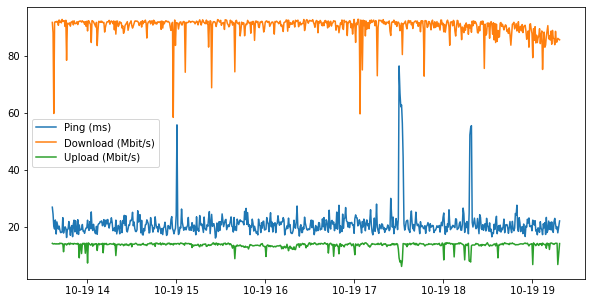

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))

t = pd.to_datetime(df_clean['Time'])

ax.plot(t, df_clean['Ping (ms)'], label='Ping (ms)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')

ax.legend()
plt.show()

In [34]:
type(t[0])

pandas._libs.tslibs.timestamps.Timestamp

**c) Cambie el estilo de línea.**

Como las mediciones de ping incluyen variaciones grandes y abruptas, quizás puedan visualizarse mejor mediante puntos. Dentro del comando ax.plot (...) que permite visualizar datos de ping, especifique que estas mediciones estarán representadas como puntos. (Aquí, la mayoría de los códigos se pueden obtener de la tarea anterior).

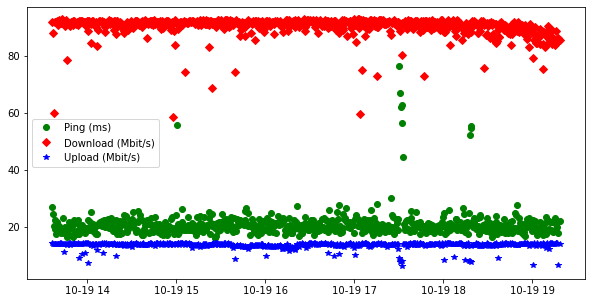

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))

t = pd.to_datetime(df_clean['Time'])

ax.plot(t, df_clean['Ping (ms)'], 'o', color='g',label='Ping (ms)')
ax.plot(t, df_clean['Download (Mbit/s)'], 'D', color='r',label='Download (Mbit/s)')
ax.plot(t, df_clean['Upload (Mbit/s)'],'*', color='b',label='Upload (Mbit/s)')

ax.legend()
plt.show()

**d) Agregue etiquetas a los ejes.**

Un gráfico sin ejes etiquetados, y quizás sin un título, es difícil de comprender, ya que uno puede no saber con seguridad qué cantidades se representan. Cree los gráficos anteriores según la práctica científica estándar agregando etiquetas y un título a los ejes. Especifique un tamaño de fuente de alrededor de 16, de modo que el título y las etiquetas se impriman nítidamente.

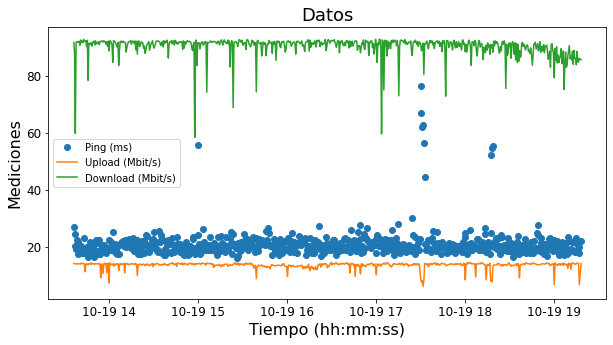

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))

t = pd.to_datetime(df_clean['Time'])
ax.plot(t, df_clean['Ping (ms)'], 'o', label='Ping (ms)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')

ax.legend()

ax.set_xlabel('Tiempo (hh:mm:ss)', size=16)
ax.set_ylabel('Mediciones', size=16)
ax.set_title('Datos',size=18)

ax.tick_params(labelsize=12)

**e) Cambie la temática del gráfico.**

Utilice el contexto de estilo ‘fivethirtyeight’ para que el gráfico anterior tenga más atractivo visual. Para hacerlo, agregue la fila con with a su código antes de activar las funciones de Matplotlib.

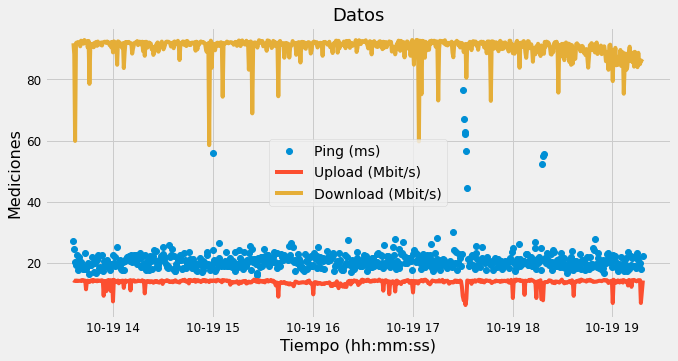

In [37]:
with plt.style.context('fivethirtyeight'):

    fig, ax = plt.subplots(figsize=(10, 5))

    t = pd.to_datetime(df_clean['Time'])
    ax.plot(t, df_clean['Ping (ms)'], 'o', label='Ping (ms)')
    ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
    ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')

    ax.legend()

    ax.set_xlabel('Tiempo (hh:mm:ss)', size=16)
    ax.set_ylabel('Mediciones', size=16)
    ax.set_title('Datos',size=18)

    ax.tick_params(labelsize=12)

**f) Cree un histograma**

Un histograma es una representación gráfica de la frecuencia de los valores de datos numéricos. Analice el código que aparece a continuación. Un nivel adicional de complejidad es el uso de los argumentos secundarios para visualizar histogramas de lado a lado.

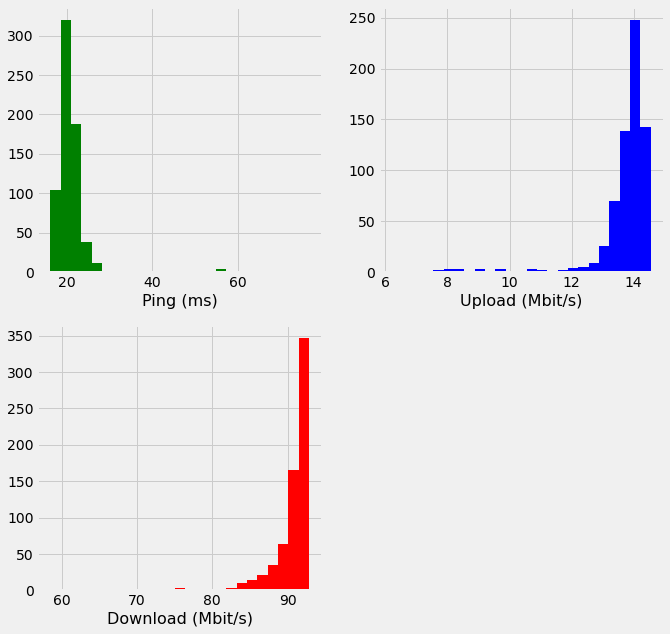

In [38]:
with plt.style.context('fivethirtyeight'):

    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0][0].hist(df_clean['Ping (ms)'], 25,color='g')
    ax[0][0].set_xlabel('Ping (ms)', fontsize=16)
    ax[0][0].tick_params(labelsize=14)
    ax[0][1].hist(df_clean['Upload (Mbit/s)'], 25, color='b')
    ax[0][1].set_xlabel('Upload (Mbit/s)', fontsize=16)
    ax[0][1].tick_params(labelsize=14)
    ax[1][0].hist(df_clean['Download (Mbit/s)'], 25, color='r')
    ax[1][0].set_xlabel('Download (Mbit/s)', fontsize=16)
    ax[1][0].tick_params(labelsize=14)
    ax[1][1].set_visible(False)